In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('elnino.csv')
df

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19
...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03


In [4]:
df.columns

Index(['Observation', ' Year', ' Month', ' Day', ' Date', ' Latitude',
       ' Longitude', ' Zonal Winds', ' Meridional Winds', ' Humidity',
       ' Air Temp', ' Sea Surface Temp'],
      dtype='object')

In [5]:
df.dtypes

Observation            int64
 Year                  int64
 Month                 int64
 Day                   int64
 Date                  int64
 Latitude            float64
 Longitude           float64
 Zonal Winds          object
 Meridional Winds     object
 Humidity             object
 Air Temp             object
 Sea Surface Temp     object
dtype: object

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Observation          0
 Year                0
 Month               0
 Day                 0
 Date                0
 Latitude            0
 Longitude           0
 Zonal Winds         0
 Meridional Winds    0
 Humidity            0
 Air Temp            0
 Sea Surface Temp    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Observation        178080 non-null  int64  
 1    Year              178080 non-null  int64  
 2    Month             178080 non-null  int64  
 3    Day               178080 non-null  int64  
 4    Date              178080 non-null  int64  
 5    Latitude          178080 non-null  float64
 6    Longitude         178080 non-null  float64
 7    Zonal Winds       178080 non-null  object 
 8    Meridional Winds  178080 non-null  object 
 9    Humidity          178080 non-null  object 
 10   Air Temp          178080 non-null  object 
 11   Sea Surface Temp  178080 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


In [9]:
df.describe()

,Observation,Year,Month,Day,Date,Latitude,Longitude
count,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000
mean,89040.500000,93.302325,6.504869,15.720536,933689.455374,0.473626,-54.025233
std,51407.412306,3.393818,3.459657,8.800487,33900.474320,4.583041,135.363994
min,1.000000,80.000000,1.000000,1.000000,800307.000000,-8.810000,-180.000000
25%,44520.750000,92.000000,4.000000,8.000000,920116.000000,-2.010000,-154.950000
50%,89040.500000,94.000000,6.000000,16.000000,940601.000000,0.010000,-111.260000
75%,133560.250000,96.000000,10.000000,23.000000,960617.000000,4.980000,147.010000
max,178080.000000,98.000000,12.000000,31.000000,980623.000000,9.050000,171.080000


In [10]:
df.dtypes

Observation            int64
 Year                  int64
 Month                 int64
 Day                   int64
 Date                  int64
 Latitude            float64
 Longitude           float64
 Zonal Winds          object
 Meridional Winds     object
 Humidity             object
 Air Temp             object
 Sea Surface Temp     object
dtype: object

In [11]:
names = list(df.columns)
for i in range(0,12):
    names[i] = names[i].lstrip()
df.columns = names


In [12]:
df['Zonal Winds'] = pd.to_numeric(df['Zonal Winds'], errors='coerce')
df['Meridional Winds'] = pd.to_numeric(df['Meridional Winds'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
df['Air Temp'] = pd.to_numeric(df['Air Temp'], errors='coerce')
df['Sea Surface Temp'] = pd.to_numeric(df['Sea Surface Temp'], errors='coerce')


In [13]:
nan_counts = df[['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp']].isnull().sum()
print(nan_counts)


Zonal Winds         25163
Meridional Winds    25162
Humidity            65761
Air Temp            18237
Sea Surface Temp    17007
dtype: int64


In [14]:
df.shape

(178080, 12)

In [15]:
columns_to_check = ['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp']
df.dropna(subset=columns_to_check, inplace=True)


In [16]:
df.shape

(93935, 12)

In [17]:
 df.drop_duplicates()


,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
4059,4060,93,5,9,930509,-0.02,-109.96,-2.1,2.1,81.2,26.80,27.02
4060,4061,93,5,10,930510,-0.02,-109.96,-3.4,1.4,84.2,26.95,26.91
4061,4062,93,5,11,930511,-0.02,-109.96,-3.8,2.2,84.9,26.98,26.78
4062,4063,93,5,12,930512,-0.02,-109.96,-3.0,1.5,86.9,26.93,26.74
4063,4064,93,5,13,930513,-0.02,-109.96,-4.5,1.9,87.6,27.01,26.82
...,...,...,...,...,...,...,...,...,...,...,...,...
178074,178075,98,6,10,980610,8.95,-140.33,-6.8,-5.3,81.3,27.52,28.17
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93


In [18]:
import pandas as pd

# Assuming df is your DataFrame
# Create a temporary column with the combined string format of the date
df['combined_date_str'] = df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2)

# Convert the combined string date to a datetime object
df['combined_date'] = pd.to_datetime(df['combined_date_str'], format='%y%m%d')

# Drop the temporary column
df = df.drop('combined_date_str', axis=1)



df

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp,combined_date
4059,4060,93,5,9,930509,-0.02,-109.96,-2.1,2.1,81.2,26.80,27.02,1993-05-09
4060,4061,93,5,10,930510,-0.02,-109.96,-3.4,1.4,84.2,26.95,26.91,1993-05-10
4061,4062,93,5,11,930511,-0.02,-109.96,-3.8,2.2,84.9,26.98,26.78,1993-05-11
4062,4063,93,5,12,930512,-0.02,-109.96,-3.0,1.5,86.9,26.93,26.74,1993-05-12
4063,4064,93,5,13,930513,-0.02,-109.96,-4.5,1.9,87.6,27.01,26.82,1993-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178074,178075,98,6,10,980610,8.95,-140.33,-6.8,-5.3,81.3,27.52,28.17,1998-06-10
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14,1998-06-11
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87,1998-06-12
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93,1998-06-13


In [19]:
df.set_index('combined_date', inplace=True)
df

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
combined_date,,,,,,,,,,,,
1993-05-09,4060,93,5,9,930509,-0.02,-109.96,-2.1,2.1,81.2,26.80,27.02
1993-05-10,4061,93,5,10,930510,-0.02,-109.96,-3.4,1.4,84.2,26.95,26.91
1993-05-11,4062,93,5,11,930511,-0.02,-109.96,-3.8,2.2,84.9,26.98,26.78
1993-05-12,4063,93,5,12,930512,-0.02,-109.96,-3.0,1.5,86.9,26.93,26.74
1993-05-13,4064,93,5,13,930513,-0.02,-109.96,-4.5,1.9,87.6,27.01,26.82
...,...,...,...,...,...,...,...,...,...,...,...,...
1998-06-10,178075,98,6,10,980610,8.95,-140.33,-6.8,-5.3,81.3,27.52,28.17
1998-06-11,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
1998-06-12,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87


In [20]:
X = df.drop(columns=['Sea Surface Temp'])
y = df['Sea Surface Temp']

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
X_train.shape

(75148, 11)

In [24]:
X_test.shape

(18787, 11)

In [25]:
y_train.shape

(75148,)

In [26]:
y_test.shape

(18787,)

In [27]:
from sklearn.linear_model import LinearRegression


In [28]:
model = LinearRegression()


In [29]:
model.fit(X_train, y_train)


LinearRegression()

In [30]:
y_pred = model.predict(X_test)
y_pred

array([27.76136057, 22.30956986, 24.40881777, ..., 29.59986437,
       27.96437824, 25.05983584])

In [31]:
from sklearn.metrics import mean_squared_error


In [32]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.30357446408636407


In [33]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9136331689897347


In [34]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.4183612450613975


In [35]:
import numpy as np
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.5509759196973713


In [36]:
from sklearn.metrics import explained_variance_score

evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')


Explained Variance Score: 0.9136418741424697


In [37]:
from sklearn.metrics import mean_squared_log_error

msle = mean_squared_log_error(y_test, y_pred)
print(f'Mean Squared Logarithmic Error: {msle}')


Mean Squared Logarithmic Error: 0.00037569554569477783


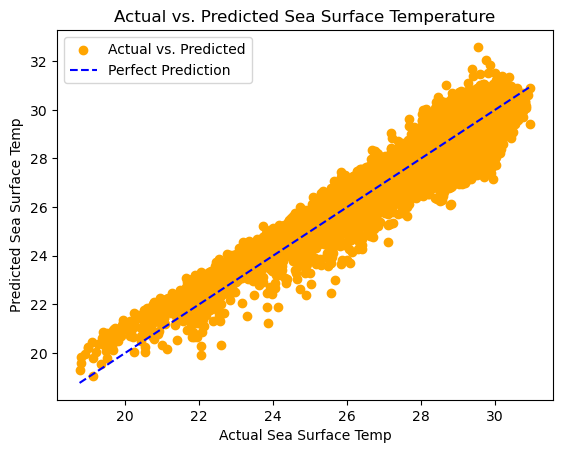

In [38]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values with a dotted line
plt.scatter(y_test, y_pred, color='orange', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', label='Perfect Prediction')

plt.xlabel("Actual Sea Surface Temp")
plt.ylabel("Predicted Sea Surface Temp")
plt.title("Actual vs. Predicted Sea Surface Temperature")
plt.legend()
plt.show()


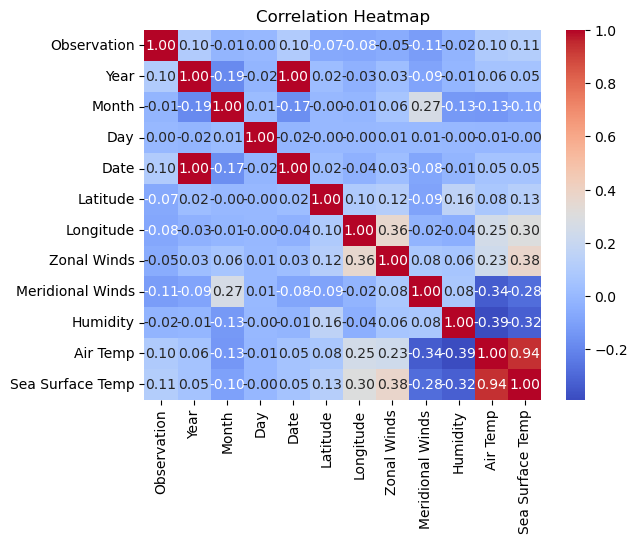

In [39]:
import seaborn as sns

# Assuming df is your DataFrame
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


sns.displot(df['Sea Surface Temp'], kde=True, bins=20, color='blue')
plt.title('Distribution of Sea Surface Temperature')
plt.show()


sns.boxplot(x='Month', y='Sea Surface Temp', data=df)
plt.title('Sea Surface Temperature Across Months')
plt.show()

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


NameError: name 'make_pipeline' is not defined

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Select the top features based on the correlation matrix
top_features = ['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp']

# Extract the selected features
X_poly = X[top_features]

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_poly, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a range of degrees to try
degrees_to_try = [2, 3, 4]

# Create a pipeline with PolynomialFeatures and LinearRegression
polyreg_model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Use GridSearchCV to search for the best degree
param_grid = {'polynomialfeatures__degree': degrees_to_try}
grid = GridSearchCV(polyreg_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Get the best degree from the grid search
best_degree = grid.best_params_['polynomialfeatures__degree']

# Create the final polynomial regression model with the best degree
final_polyreg_model = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())

# Fit the final model to the training data
final_polyreg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = final_polyreg_model.predict(X_val)

# Make predictions on the test set
y_test_pred = final_polyreg_model.predict(X_test)

# Evaluate the performance on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

# Evaluate the performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Polynomial Regression (Degree {best_degree}) - Validation Set Metrics:')
print(f'Mean Squared Error: {mse_val}')
print(f'R-squared: {r2_val}')
print(f'Mean Absolute Error: {mae_val}')

print(f'\nPolynomial Regression (Degree {best_degree}) - Test Set Metrics:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')
print(f'Mean Absolute Error: {mae_test}')


Polynomial Regression (Degree 4) - Validation Set Metrics:
Mean Squared Error: 0.22121026023523346
R-squared: 0.9378914093275385
Mean Absolute Error: 0.35633874769559676

Polynomial Regression (Degree 4) - Test Set Metrics:
Mean Squared Error: 0.22012731597514482
R-squared: 0.937162782445002
Mean Absolute Error: 0.3536074867238823


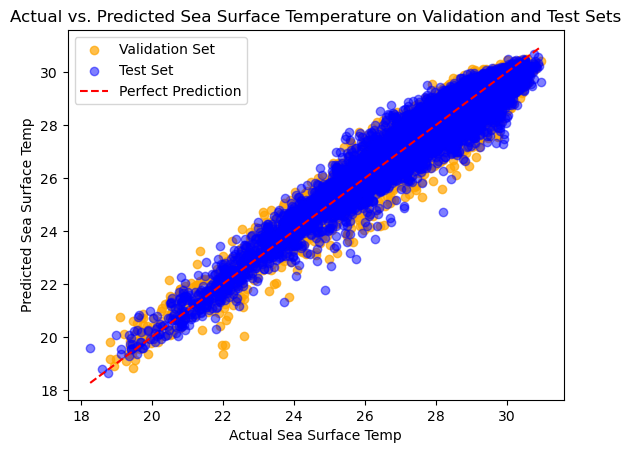

In [47]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values on the validation set
plt.scatter(y_val, y_val_pred, color='orange', label='Validation Set', alpha=0.7)
# Scatter plot of actual vs. predicted values on the test set with reduced opacity
plt.scatter(y_test, y_test_pred, color='blue', label='Test Set', alpha=0.5)
# Scatter plot of the 45-degree line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel("Actual Sea Surface Temp")
plt.ylabel("Predicted Sea Surface Temp")
plt.title("Actual vs. Predicted Sea Surface Temperature on Validation and Test Sets")
plt.legend()
plt.show()


In [45]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values on the validation set
plt.scatter(y_val, y_val_pred, color='orange', label='Validation Set', alpha=0.7)
# Scatter plot of actual vs. predicted values on the test set with reduced opacity
plt.scatter(y_test, y_test_pred, color='blue', label='Test Set', alpha=0.5)
# Scatter plot of the 45-degree line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel("Actual Sea Surface Temp")
plt.ylabel("Predicted Sea Surface Temp")
plt.title("Actual vs. Predicted Sea Surface Temperature on Validation and Test Sets")
plt.legend()
plt.show()

NameError: name 'y_val_pred' is not defined